# Workshop Random Forest Classifier
### Benodigde modules:
- pandas
- sklearn
- matplotlib
- Graphviz (Pas het path hieronder aan als nodig)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
%matplotlib inline

### Waarom zijn Random Forest Classifiers zo effectief?

Random Forest Classifiers zijn een van meest succesvolle supervised classifying machine learning algoritmes. Dit heeft de maken met de manier waarop ze werken. Het idee achter dit algoritme is gerelateerd aan het divide and conquer principe. Door een probleem in meerdere problemen op te splitsen, kunnen veel betere resultaten behaald worden.

Het divide and conquer principe kan goed uitgebeeld worden aan de hand van een spelletje. 


##### Spelregels:
Genereer een random getal tussen de 0 en 1.
Als het getal kleiner dan/gelijk aan 0.4 is dan verlies je het geld
Als het getal groter dan 0.4 dan win je het geld

##### Situaties:
- 10 keer met 100 euro
- 100 keer met 10 euro
- 1000 keer met 1 euro

In welk spelletje heb je de meeste winkans met de bovenstaande spelregels? Schrijf code om dit spelletje (x aantal keer) te kunnen spelen Simuleer elk van de drie situaties 10000 keer en plot de resultaten in een bar plot om te kijken hoevaak je in elk spelletje iets wint of verliest.

In [52]:
# to remove
def win_money(play, money, repeat) -> [int]:
    
    total_results = []
    
    for r in range(repeat):
        
        game_result = 0
        
        for p in range(play):
            
            if random.random() <= 0.4:
                game_result -= money
            else:
                game_result += money
            
        total_results.append(game_result)
        
    return total_results

In [53]:
# to remove
a = win_money(1, 100, 10000)
b = win_money(10, 10, 10000)
c = win_money(100, 1, 10000)

In [54]:
# to remove
a_ = pd.Series(a).value_counts()
b_ = pd.Series(b).value_counts()
c_ = pd.Series(c).value_counts()

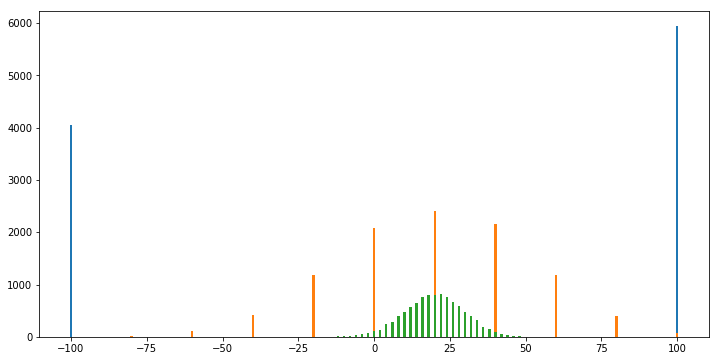

In [55]:
# to remove
plt.figure(figsize=(12,6))
plt.bar(a_.index, a_)
plt.bar(b_.index, b_)
plt.bar(c_.index, c_)
plt.show()

### Hieronder staat een uitwerking van het voorbeeld van de presentatie
We beginnen eerst met de dataset laden en de integers te converten naar float.

Hieronder zie je hoe de train dataset eruit ziet

In [ ]:
df_train = pd.read_excel("dataset/fruits_train.xlsx")
df_test = pd.read_excel("dataset/fruits_test.xlsx")

train, test = df_train, df_test
train['Diameter'] = pd.to_numeric(train['Diameter'], downcast='float')
test['Diameter'] = pd.to_numeric(test['Diameter'], downcast='float')
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))
train

#### Nu bepaal je wat de features en classes zijn

In [ ]:
features = ['Color', 'Diameter']
classes = ['Apple','Orange','Cherries','Citrus']

#### Strings worden niet geaccepteerd door de classifier. Dit betekend dat wij moeten factorizen of dummies genereren.
Hieronder factorizen wij de kleuren naar:
- Red = 0
- Orange = 1
- Yellow = 2

In [ ]:
train['Color'] = pd.factorize(train['Color'])[0]
test['Color'] = pd.factorize(test['Color'])[0]
# Target Feature
y = pd.factorize(train['Label'])[0]

print(train)
print(test)

### Dan definier je de RandomForestClassifier en voer je de fit uit
In dit geval doen wij dat met 3 estimators (trees) en gebruiken entropie als meetstaaf in plaats van de gini-waarde

In [ ]:
clf = RandomForestClassifier(random_state=0, n_estimators=3, criterion='entropy')
clf.fit(train[features], y)

### Hier zie je welke trees eruit komen

In [ ]:
def export_graph(estimator):
    # Export as dot file
    export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = features,
                    class_names = classes,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in jupyter notebook
    Image(filename = 'tree.png')

In [ ]:
export_graph(clf.estimators_[0])
Image(filename = 'tree.png')

In [ ]:
export_graph(clf.estimators_[1])
Image(filename = 'tree.png')

In [ ]:
export_graph(clf.estimators_[2])
Image(filename = 'tree.png')

### De volgende stap is om te bepalen of het algoritme goed werkt
De feature importances functie laat zien welke feature de grootste information gain haalt gemiddeld. Dit is interresant genoeg de diameter, ook al is de kleur discriminerender. Laat je hier dus niet door misinformeren. Verder wordt hier een score en confusion matrix (niet en wel genormaliseerd) neergezet.

In [ ]:
clf.feature_importances_

In [ ]:
y_pred = clf.predict(test[features])
y_true = pd.factorize(test['Label'])[0]
print(y_pred)
print(y_true)

In [ ]:
clf.score(test[features],y_true)

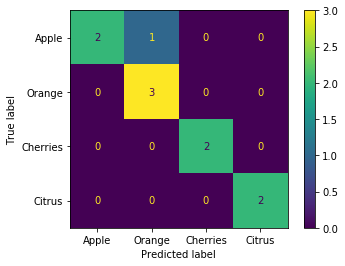

In [ ]:
plot_confusion_matrix(clf, test[features], y_true, display_labels=classes)

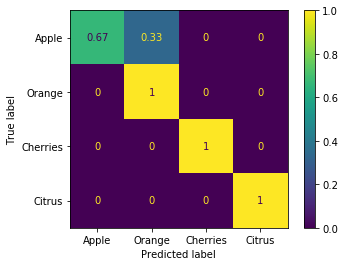

In [ ]:
plot_confusion_matrix(clf, test[features], y_true, display_labels=classes, normalize='true')

# Hier begint de workshop
We gaan beginnen met de wine dataset

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
df.head()

In [ ]:
# features = [df.columns[:-1]][0]
features = ['alcohol', 'malic_acid', 'ash']
features

In [ ]:
clf = RandomForestClassifier(random_state=0, n_estimators=10, criterion='entropy')
clf.fit(df[features], df['target'])

In [ ]:
y_pred = clf.predict(df[features])
y_true = df['target']
y_pred

In [ ]:
clf.score(df[features], df['target'])

In [ ]:
clf.feature_importances_

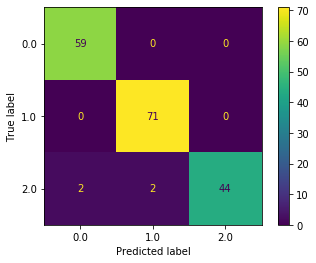

In [ ]:
plot_confusion_matrix(clf, df[features], y_true, normalize=None)

# Missing Data

In [22]:
df_mis = df[100:110]
df_misn

NameError: name 'df_misn' is not defined

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)


print(imp_mean.transform(df))